In [2]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr

from pylab import plt
plt.style.use('seaborn')
# magic function 用来替代plt.show()
%matplotlib inline 

In [23]:
from sklearn.tree import DecisionTreeRegressor

In [24]:
# 这只股票是google
# 从yahoo上查到的信息
# Google的
data = pdr.DataReader('GOOG', data_source='yahoo', start='1/1/2000')
#data = pdr.DataReader('GOOG', data_source='yahoo', start='1/1/2022')
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.835709,47.800831,49.813290,49.982655,44871361.0,49.982655
2004-08-20,54.336334,50.062355,50.316402,53.952770,22942874.0,53.952770
2004-08-23,56.528118,54.321388,55.168217,54.495735,18342897.0,54.495735
2004-08-24,55.591629,51.591621,55.412300,52.239197,15319808.0,52.239197
2004-08-25,53.798351,51.746044,52.284027,52.802086,9232276.0,52.802086


In [25]:
data.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-03-31,2852.889893,2792.379883,2848.969971,2792.989990,1475800.0,2792.989990
2022-04-01,2819.000000,2775.939941,2800.199951,2814.000000,1173600.0,2814.000000
2022-04-04,2880.875000,2816.489990,2816.489990,2872.850098,953800.0,2872.850098
2022-04-05,2871.800049,2818.870117,2867.989990,2821.260010,962800.0,2821.260010
2022-04-06,2796.969971,2728.362061,2783.229980,2743.520020,1177400.0,2743.520020


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4440 entries, 2004-08-19 to 2022-04-06
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       4440 non-null   float64
 1   Low        4440 non-null   float64
 2   Open       4440 non-null   float64
 3   Close      4440 non-null   float64
 4   Volume     4440 non-null   float64
 5   Adj Close  4440 non-null   float64
dtypes: float64(6)
memory usage: 242.8 KB


In [27]:
data = data[['Adj Close']]
data.head()

,Adj Close
Date,
2004-08-19,49.982655
2004-08-20,53.952770
2004-08-23,54.495735
2004-08-24,52.239197
2004-08-25,52.802086


In [28]:
# data.shift -> 把数据往下移动
data.shift()

,Adj Close
Date,
2004-08-19,NaN
2004-08-20,49.982655
2004-08-23,53.952770
2004-08-24,54.495735
2004-08-25,52.239197
...,...
2022-03-31,2852.889893
2022-04-01,2792.989990
2022-04-04,2814.000000


In [29]:
# 连续时间的报酬率
data['Returns'] = np.log(data / data.shift())
data.head()

,Adj Close,Returns
Date,,
2004-08-19,49.982655,NaN
2004-08-20,53.952770,0.076433
2004-08-23,54.495735,0.010013
2004-08-24,52.239197,-0.042289
2004-08-25,52.802086,0.010718


In [30]:
for lags in range(1, 3):
    cols = []
    
    for lag in range(1, lags + 1):
        col = 'lag_{}'.format(lag)
        data[col] = data['Returns'].shift(lag)
        cols.append(col)
        
        data.dropna(inplace=True)
    
    print(cols)
    model = DecisionTreeRegressor(random_state=100)
    model.fit(data[cols], np.sign(data['Returns']))
    
    print("The R_square is {}".format(model.score(data[cols], np.sign(data['Returns']))))
    

['lag_1']
The R_square is 0.9936716818815227
['lag_1', 'lag_2']
The R_square is 1.0


In [31]:
data.head()

,Adj Close,Returns,lag_1,lag_2
Date,,,,
2004-08-26,53.753517,0.017858,0.010718,-0.042289
2004-08-27,52.876804,-0.016444,0.017858,0.010718
2004-08-30,50.814533,-0.039782,-0.016444,0.017858
2004-08-31,50.993862,0.003523,-0.039782,-0.016444
2004-09-01,49.937820,-0.020927,0.003523,-0.039782


In [32]:
model = DecisionTreeRegressor(random_state=100)
model.fit(data[cols], np.sign(data['Returns']))

data['Pred'] = np.where(model.predict(data[cols]) > 0, 1, -1)
data['Stra'] = data['Pred'] * data['Returns']
data.head()

,Adj Close,Returns,lag_1,lag_2,Pred,Stra
Date,,,,,,
2004-08-26,53.753517,0.017858,0.010718,-0.042289,1,0.017858
2004-08-27,52.876804,-0.016444,0.017858,0.010718,-1,0.016444
2004-08-30,50.814533,-0.039782,-0.016444,0.017858,-1,0.039782
2004-08-31,50.993862,0.003523,-0.039782,-0.016444,1,0.003523
2004-09-01,49.937820,-0.020927,0.003523,-0.039782,-1,0.020927


In [33]:
data[['Returns', 'Stra']].cumsum().apply(np.exp).tail()

,Returns,Stra
Date,,
2022-03-31,52.895448,2.679460e+24
2022-04-01,53.293349,2.699616e+24
2022-04-04,54.407890,2.756074e+24
2022-04-05,53.430844,2.806472e+24
2022-04-06,51.958554,2.885996e+24


<AxesSubplot:xlabel='Date'>

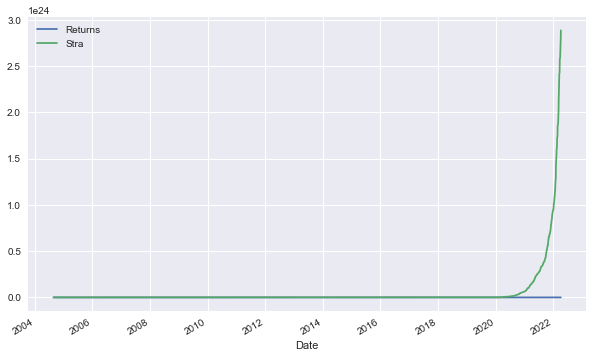

In [35]:
data[['Returns', 'Stra']].cumsum().apply(np.exp).plot(figsize=(10, 6))